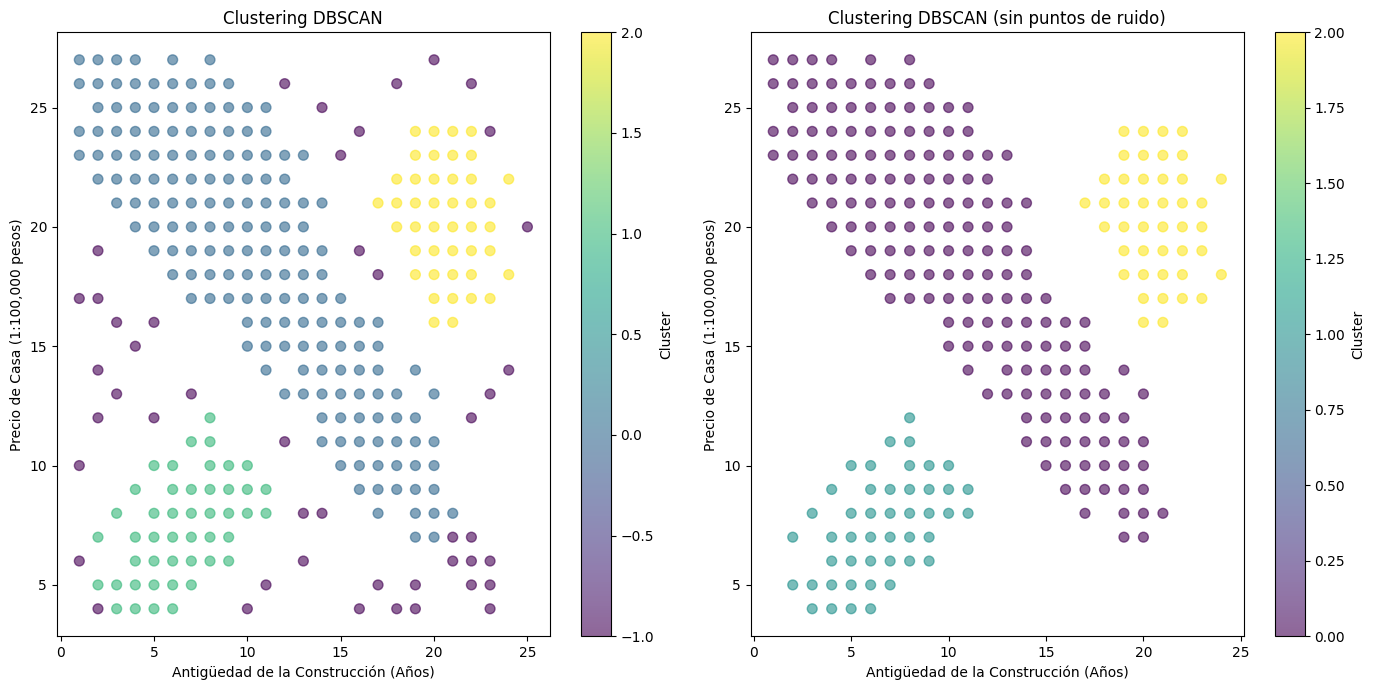

(        Antigüedad (Años)                                                     \
                     count       mean       std   min   25%   50%   75%   max   
 Cluster                                                                        
 -1                   47.0  13.744681  8.082370   1.0   5.0  16.0  21.5  25.0   
  0                  171.0  10.608187  5.212400   1.0   6.5  11.0  15.0  21.0   
  1                   46.0   6.521739  2.354562   2.0   5.0   6.5   8.0  11.0   
  2                   43.0  20.674419  1.672195  17.0  19.5  21.0  22.0  24.0   
 
         Precio (x100,000 pesos)                                               \
                           count       mean       std   min   25%   50%   75%   
 Cluster                                                                        
 -1                         47.0  12.574468  7.476760   4.0   6.0  12.0  17.5   
  0                        171.0  18.467836  5.414889   7.0  14.0  19.0  23.0   
  1                       

In [ ]:
# Mejorando el código para un análisis más profundo

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd

# Usamos Pandas para facilitar análisis descriptivo
columnas = ['Antigüedad (Años)', 'Precio (x100,000 pesos)']
df = pd.DataFrame(datos, columns=columnas)

# Aplicar DBSCAN para identificar clusters
eps = 2  # Definir el radio de vecindad (ajustable para mejor resultado)
min_samples = 10  # Definir el número mínimo de puntos por cluster
modelo_dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df['Cluster'] = modelo_dbscan.fit_predict(df[['Antigüedad (Años)', 'Precio (x100,000 pesos)']])

# Mostrar los clusters creados
clusters = df['Cluster'].unique()

# Mostrar estadísticas descriptivas por cluster
stats_clusters = df.groupby('Cluster').describe()

# Mostrar el head del dataframe
head_df = df.head()

# Crear gráficos mejorados
plt.figure(figsize=(14, 7))

# Gráfico de dispersión de los clusters
plt.subplot(1, 2, 1)
plt.scatter(df['Antigüedad (Años)'], df['Precio (x100,000 pesos)'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Clustering DBSCAN')
plt.xlabel('Antigüedad de la Construcción (Años)')
plt.ylabel('Precio de Casa (1:100,000 pesos)')
plt.colorbar(label='Cluster')

# Gráfico sin puntos de ruido (-1 representa ruido en DBSCAN)
plt.subplot(1, 2, 2)
df_sin_ruido = df[df['Cluster'] != -1]
plt.scatter(df_sin_ruido['Antigüedad (Años)'], df_sin_ruido['Precio (x100,000 pesos)'],
            c=df_sin_ruido['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Clustering DBSCAN (sin puntos de ruido)')
plt.xlabel('Antigüedad de la Construcción (Años)')
plt.ylabel('Precio de Casa (1:100,000 pesos)')
plt.colorbar(label='Cluster')
plt.tight_layout()

# Mostrar resultados de análisis
plt.show()

stats_clusters, head_df

Cluster 0:

Este es el grupo más grande, con 171 casas.
Antigüedad: Las casas en este cluster tienen una antigüedad media de 10.61 años, con una desviación estándar de 5.21 años, lo que indica que los valores varían moderadamente en este cluster.
Precio: El precio promedio es de 18.47 (1,846,783 pesos), y los precios varían desde 7 (700,000 pesos) hasta 27 (2,700,000 pesos).
Cluster 1:

Contiene 46 casas.
Antigüedad: Estas casas son más nuevas, con una antigüedad media de 6.52 años.
Precio: El precio medio es más bajo en este grupo, 7.43 (743,478 pesos), con precios que oscilan entre 4 (400,000 pesos) y 12 (1,200,000 pesos).
Cluster 2:

Este cluster contiene 43 casas.
Antigüedad: Las casas en este grupo son más antiguas, con una media de 20.67 años.
Precio: Los precios son más altos aquí, con un promedio de 20.28 (2,027,907 pesos), y los precios van desde 16 (1,600,000 pesos) hasta 24 (2,400,000 pesos).